In [14]:
import pandas as pd

In [9]:
pip install yfinance

You should consider upgrading via the '/Users/marielyngholm/.pyenv/versions/3.8.12/envs/lewagon/bin/python3.8 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [10]:
import yfinance as yf

sp500 = yf.Ticker("^GSPC")

In [12]:
sp500 = sp500.history(period="max")

In [13]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000,0,0
1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000,0,0
1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000,0,0
1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000,0,0
1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000,0,0
...,...,...,...,...,...,...,...
2022-07-07,3858.850098,3910.629883,3858.850098,3902.620117,3337710000,0,0
2022-07-08,3888.260010,3918.500000,3869.340088,3899.379883,2844620000,0,0
2022-07-11,3880.939941,3880.939941,3847.219971,3854.429932,3023830000,0,0


In [15]:
sp500.index

DatetimeIndex(['1950-01-03', '1950-01-04', '1950-01-05', '1950-01-06',
               '1950-01-09', '1950-01-10', '1950-01-11', '1950-01-12',
               '1950-01-13', '1950-01-16',
               ...
               '2022-06-29', '2022-06-30', '2022-07-01', '2022-07-05',
               '2022-07-06', '2022-07-07', '2022-07-08', '2022-07-11',
               '2022-07-12', '2022-07-13'],
              dtype='datetime64[ns]', name='Date', length=18250, freq=None)

 ### Cleaning data

<AxesSubplot:xlabel='Date'>

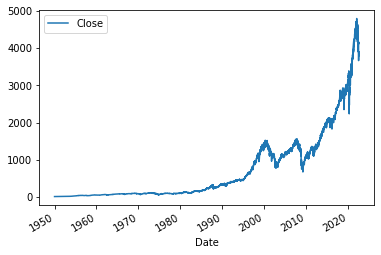

In [16]:
sp500.plot.line(y="Close", use_index=True)

In [17]:
del sp500["Dividends"]
del sp500["Stock Splits"]

#### Will the price go up or down tomorrow?

In [18]:
 sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [19]:
 sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [20]:
 sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000,16.850000,1
1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000,16.930000,1
1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000,16.980000,1
1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000,17.080000,1
1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000,17.030001,0
...,...,...,...,...,...,...,...
2022-07-07,3858.850098,3910.629883,3858.850098,3902.620117,3337710000,3899.379883,0
2022-07-08,3888.260010,3918.500000,3869.340088,3899.379883,2844620000,3854.429932,0
2022-07-11,3880.939941,3880.939941,3847.219971,3854.429932,3023830000,3818.800049,0


In [21]:
sp500 = sp500.loc["1990-01-01":].copy()

In [22]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2022-07-07,3858.850098,3910.629883,3858.850098,3902.620117,3337710000,3899.379883,0
2022-07-08,3888.260010,3918.500000,3869.340088,3899.379883,2844620000,3854.429932,0
2022-07-11,3880.939941,3880.939941,3847.219971,3854.429932,3023830000,3818.800049,0


### Training an initial ML model

In [23]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)


# All rows except the last 100 into the training set
train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [24]:
from sklearn.metrics import precision_score

# What percentage of the time did the market actually go up when we said it would go up?

preds = model.predict(test[predictors])

In [25]:
preds = pd.Series(preds, index=test.index)
preds

Date
2022-02-17    1
2022-02-18    1
2022-02-22    1
2022-02-23    1
2022-02-24    1
             ..
2022-07-07    1
2022-07-08    1
2022-07-11    1
2022-07-12    1
2022-07-13    1
Length: 100, dtype: int64

In [26]:
precision_score(test["Target"], preds)

0.44565217391304346

In [27]:
combined = pd.concat([test["Target"], preds], axis=1)

<AxesSubplot:xlabel='Date'>

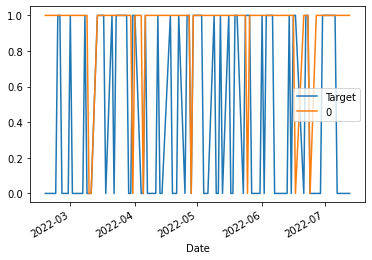

In [28]:
combined.plot()